In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

import scipy.stats
from lmfit import Model

## Defining functions

## Reading data
Los datos son obtenidos, diariamente, del Minsiterio de Sanidad en su página web, y son convertidos de los PDF a csv para poder ser analizados. Estos datos son convertidos por https://github.com/victorvicpal/COVID19_es

Las fechas corresponde a la emisión de informe del *Centro de Coordinación de Alertas y Emergencias Sanitarias*, que indica los casos consolidados a las 21:00 del día previo

In [2]:
data = pd.read_csv('../data/final_data/dataCOVID19_es.csv')
Spain = data.groupby('fecha', as_index=False).sum()

In [3]:
Confirmed = Spain.casos.values
UCI=Spain.UCI.values
Deaths = Spain.muertes.values
dates = pd.to_datetime(Spain.fecha.values).to_numpy()
#There was a gap on the reports in the 7/03 and 08/03
ind=np.where( (dates != np.datetime64(datetime(2020, 3, 7))) & (dates != np.datetime64(datetime(2020, 3, 8))))
Confirmed=Confirmed[ind]
UCI=UCI[ind]
Deaths=Deaths[ind]
dates=dates[ind]

nd=len(Confirmed)

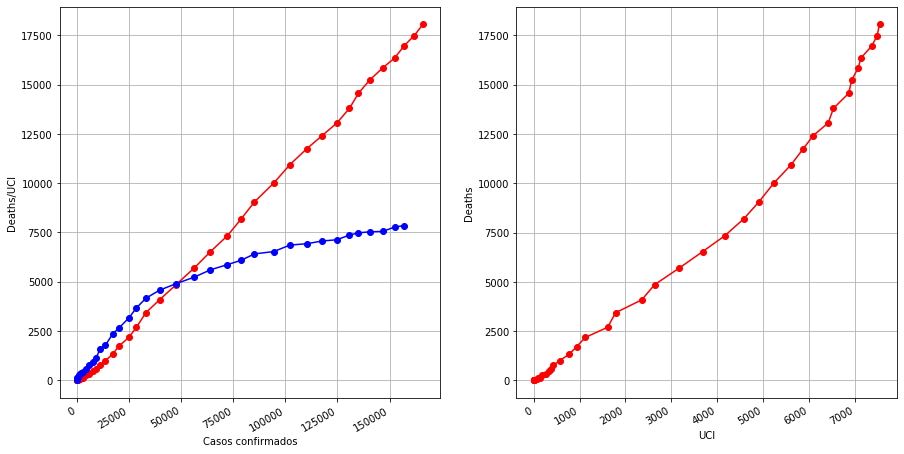

In [4]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
fig.autofmt_xdate()

ax[0].plot(Confirmed[0:nd-2],Deaths[2:nd],'ro-');
ax[0].plot(Confirmed[0:nd-4],UCI[4:nd],'bo-');
ax[0].set_ylabel('Deaths/UCI')
ax[0].set_xlabel('Casos confirmados')
ax[0].grid(True);

ax[1].plot(UCI[0:nd-3],Deaths[3:nd],'ro-');
ax[1].set_ylabel('Deaths')
ax[1].set_xlabel('UCI')
ax[1].grid(True);

In [5]:

Slope_Confirmed_Death=[]
Corr_Confirmed_Death=[]
Corr_Confirmed_UCI=[]
Corr_UCI_Deaths=[]
for ii in range(1,20):
    result = scipy.stats.linregress(Confirmed[0:nd-ii], Deaths[ii:nd])
    Corr_Confirmed_Death.append(result.rvalue)
    Slope_Confirmed_Death.append(result.slope)

    r, p=scipy.stats.pearsonr(Confirmed[0:nd-ii], UCI[ii:nd])
    Corr_Confirmed_UCI.append(r)
    
    r, p=scipy.stats.pearsonr(UCI[0:nd-ii], Deaths[ii:nd])
    Corr_UCI_Deaths.append(r)

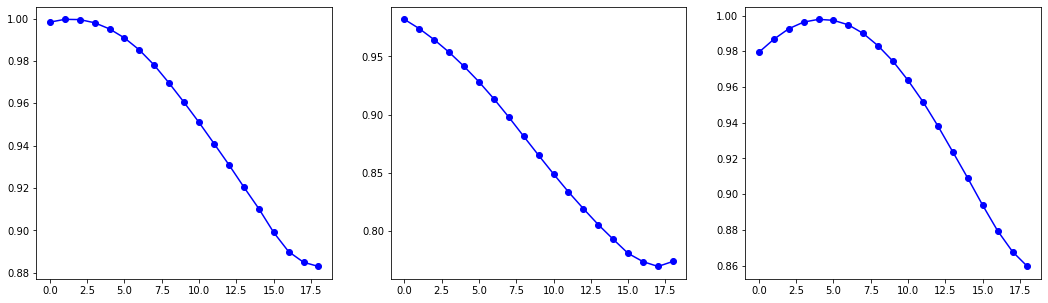

In [6]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].plot(Corr_Confirmed_Death,'b-o')
ax[1].plot(Corr_Confirmed_UCI,'b-o')
ax[2].plot(Corr_UCI_Deaths,'b-o')

In [7]:
Deaths[10]/Confirmed[10]

0.02363984008343473